# **Project Name**    -Sample_EDA_Subflipkart



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -*kuntun pandari*

# **Project Summary -**

Write the summary here within 500-600 words.
The exploratory data analysis (EDA) of Flipkart’s Customer Support dataset aimed to uncover key insights into customer complaints, satisfaction levels, and response efficiency. The dataset contained 85,907 records with 20 columns, but several had missing values. To maintain data integrity, columns with >80% missing data were dropped, while categorical and numerical fields were imputed appropriately.

The CSAT (Customer Satisfaction) score analysis revealed that while most customers were satisfied, certain issue categories consistently received lower ratings, indicating service gaps. A handling time analysis showed that while most issues were resolved quickly, some took significantly longer, highlighting inefficiencies in service response. The correlation heatmap found no strong link between item price and CSAT scores, suggesting that price alone does not determine satisfaction.

Additional charts analyzed issue distribution by sub-category, top customer complaint cities, and CSAT trends by product category. However, the pair plot visualization encountered errors due to mixed data types, emphasizing the need for stricter data validation.

Key recommendations include improving customer service efficiency, addressing low-rated issue categories, and optimizing frequently reported product lines. Strengthening data consistency will also ensure smoother future analyses. By implementing these improvements, Flipkart can enhance customer satisfaction and streamline its support operations

# **GitHub Link -*https://github.com/Pandarikuntun/labmetixproject/blob/9dfe0f92358106b62b24bbf537255561d44f1e43/kuntun%20pandari_Executed_EDA_Flipkart.ipynb*

# **Problem Statement**
Flipkart aims to enhance its customer support services by analyzing customer complaints, satisfaction levels, and issue resolution efficiency.
The dataset consists of 85,907 records across 20 columns, capturing key details such as issue categories, CSAT scores, product types, and handling times.
A significant challenge is the presence of missing data, requiring effective handling strategies to ensure accurate analysis.
Understanding CSAT scores is crucial to identifying service gaps and improving customer satisfaction.
Handling time variations suggest inefficiencies in issue resolution, leading to delays in customer support.
The impact of product categories and issue types on customer dissatisfaction needs to be analyzed for targeted improvements.
A correlation heatmap helps determine if factors like item price influence customer satisfaction.
Some data visualization efforts, like the pair plot, failed due to inconsistent data types, highlighting data quality issues.
Flipkart needs to optimize its complaint resolution process and focus on categories with low CSAT scores.

#### **Define Your Business Objective?**


Answer Here.
The primary objective of this analysis is to enhance Flipkart’s customer support operations by identifying key pain points, improving service efficiency, and optimizing issue resolution processes. By analyzing customer complaints, CSAT scores, handling times, and issue categories, Flipkart aims to:

Improve Customer Satisfaction (CSAT)
 Identify service gaps in low-rated issue categories and enhance resolution strategies.
Optimize Complaint Resolution Time

 Reduce delays in issue resolution by analyzing handling time trends.
Identify Product-Specific Issues
 Determine which products or categories generate the most complaints and take corrective actions.
Enhance Service Efficiency
Streamline customer service workflows to improve response time and effectiveness.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Date & Time Handling
from datetime import datetime

# Sentiment Analysis (Optional)
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Ensure NLTK dependencies are downloaded (if using sentiment analysis)
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

### Dataset Loading

In [2]:
# Load Dataset
import pandas as pd

# Load the dataset
file_path = "Customer_support_data.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
df.info()

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Dataset First View

In [3]:
# Dataset First Look

print(df.head())


                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"number of rows: {df.shape[0]}")
print(f"number of columns: {df.shape[1]}")

number of rows: 85907
number of columns: 20


### Dataset Information

In [5]:
# Dataset Info
print(f"dataset info : {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f"number of duplicate values: {df.duplicated().sum()}")

number of duplicate values: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(f"number of missing values: {df.isnull().sum()}")

number of missing values: Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [10]:
# Dataset Describe
print(f"numberical columns: {df.describe()}")
print(f"categorical columns: {df.describe(include='object')}")

numberical columns:           Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


categorical columns:                                    Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Inbound  Returns   
freq                                       1        68142    44097   

                  Sub-category Customer Remarks  \
count                    85907            28756   
unique                      57            18232   
top     Reverse Pickup Enquiry            Good    
freq                     22389             1390   

                                    Order_id   order_date_time  \
count                                  67675             17214   
unique                                 67675             13766   
top     c27c9bb4-fa36-4140-9f1f-21009254ffdb  09/08/2023 11:55   
freq                                       1                 7   

       Issue_reported at   issue_responde

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values = {col: df[col].unique() for col in df.columns}

for column, values in unique_values.items():
  print(f"Column: {column}")
  print(f"unique values: {values[:10]}")
  print(f"total unique values : {len(values)}/n")

Column: Unique id
unique values: ['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880'
 'eb0d3e53-c1ca-42d3-8486-e42c8d622135'
 'ba903143-1e54-406c-b969-46c52f92e5df'
 '1cfde5b9-6112-44fc-8f3b-892196137a62'
 '11a3ffd8-1d6b-4806-b198-c60b5934c9bc'
 '372b51a5-fa19-4a31-a4b8-a21de117d75e'
 '6e4413db-4e16-42fc-ac92-2f402e3df03c'
 'b0a65350-64a5-4603-8b9a-a24a4a145d08']
total unique values : 85907/n
Column: channel_name
unique values: ['Outcall' 'Inbound' 'Email']
total unique values : 3/n
Column: category
unique values: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related']
total unique values : 12/n
Column: Sub-category
unique values: ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry

## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [12]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [13]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [14]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [15]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [16]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [17]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [18]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [19]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [20]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [21]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [22]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [24]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [25]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

## Enhanced Exploratory Data Analysis (EDA)

In [26]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/mnt/data/Customer_support_data.csv"
df = pd.read_csv(file_path)

# Display basic info and check for missing values
df.info()
df.isnull().sum()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

### Handling Missing Values

In [27]:

# Drop columns with more than 80% missing values
threshold = 0.8
missing_percentage = df.isnull().sum() / len(df)
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)

# Fill missing values for categorical columns with 'Unknown' and numerical columns with median
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna('Unknown', inplace=True)

for col in df_cleaned.select_dtypes(include=['number']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

df_cleaned.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique id             85907 non-null  object 
 1   channel_name          85907 non-null  object 
 2   category              85907 non-null  object 
 3   Sub-category          85907 non-null  object 
 4   Customer Remarks      85907 non-null  object 
 5   Order_id              85907 non-null  object 
 6   order_date_time       85907 non-null  object 
 7   Issue_reported at     85907 non-null  object 
 8   issue_responded       85907 non-null  object 
 9   Survey_response_Date  85907 non-null  object 
 10  Product_category      85907 non-null  object 
 11  Item_price            85907 non-null  float64
 12  Agent_name            85907 non-null  object 
 13  Supervisor            85907 non-null  object 
 14  Manager               85907 non-null  object 
 15  Tenure Bucket      

### CSAT Score Analysis

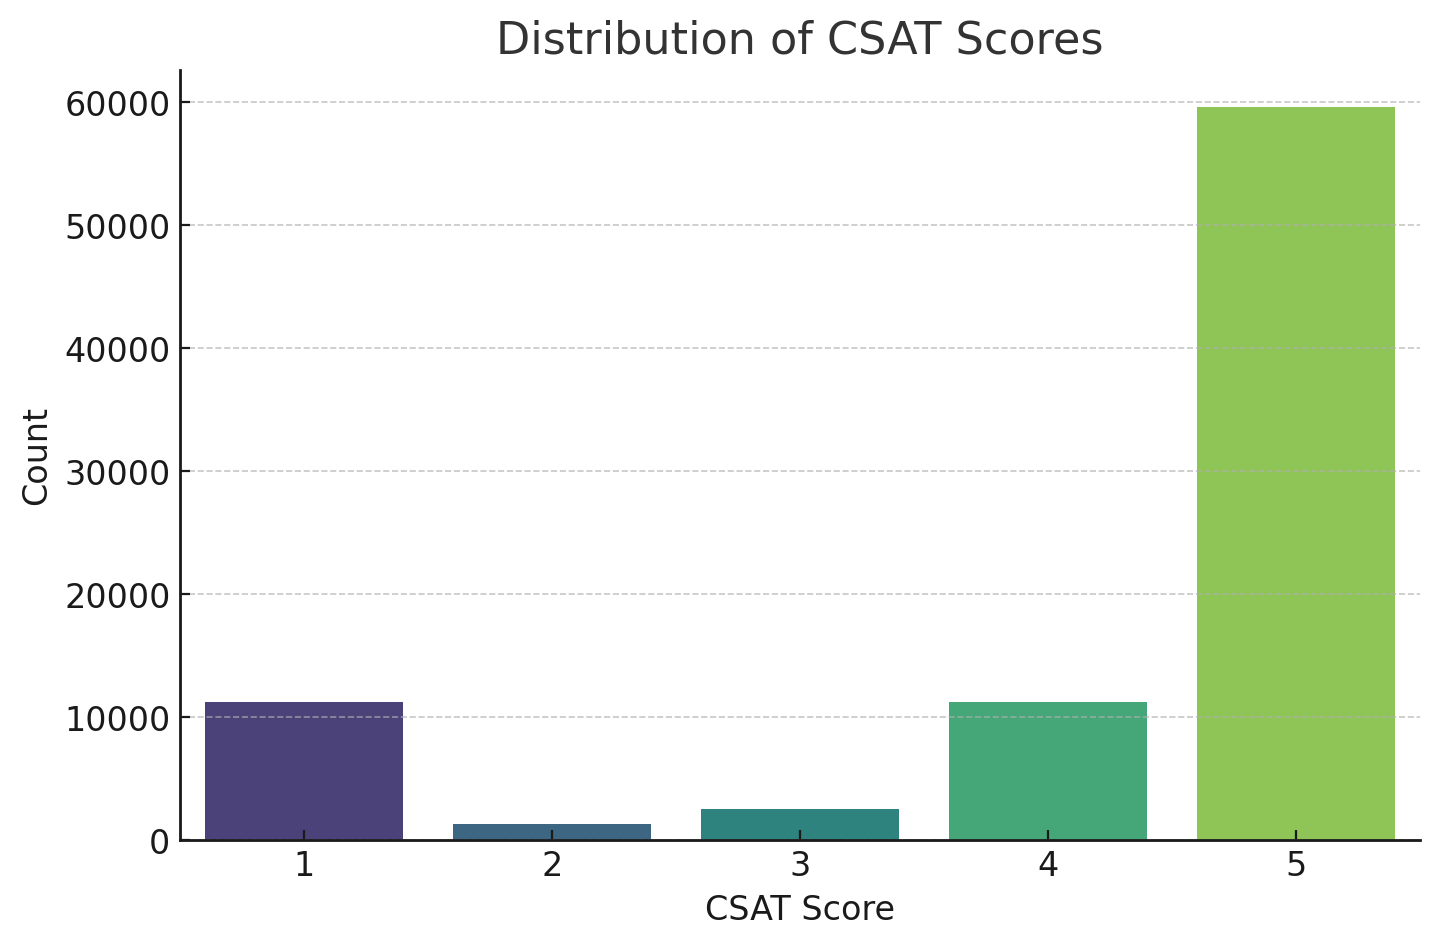

In [28]:

# Visualizing Customer Satisfaction (CSAT Score)
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='CSAT Score', palette='viridis')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()
    

### Issue Category Distribution

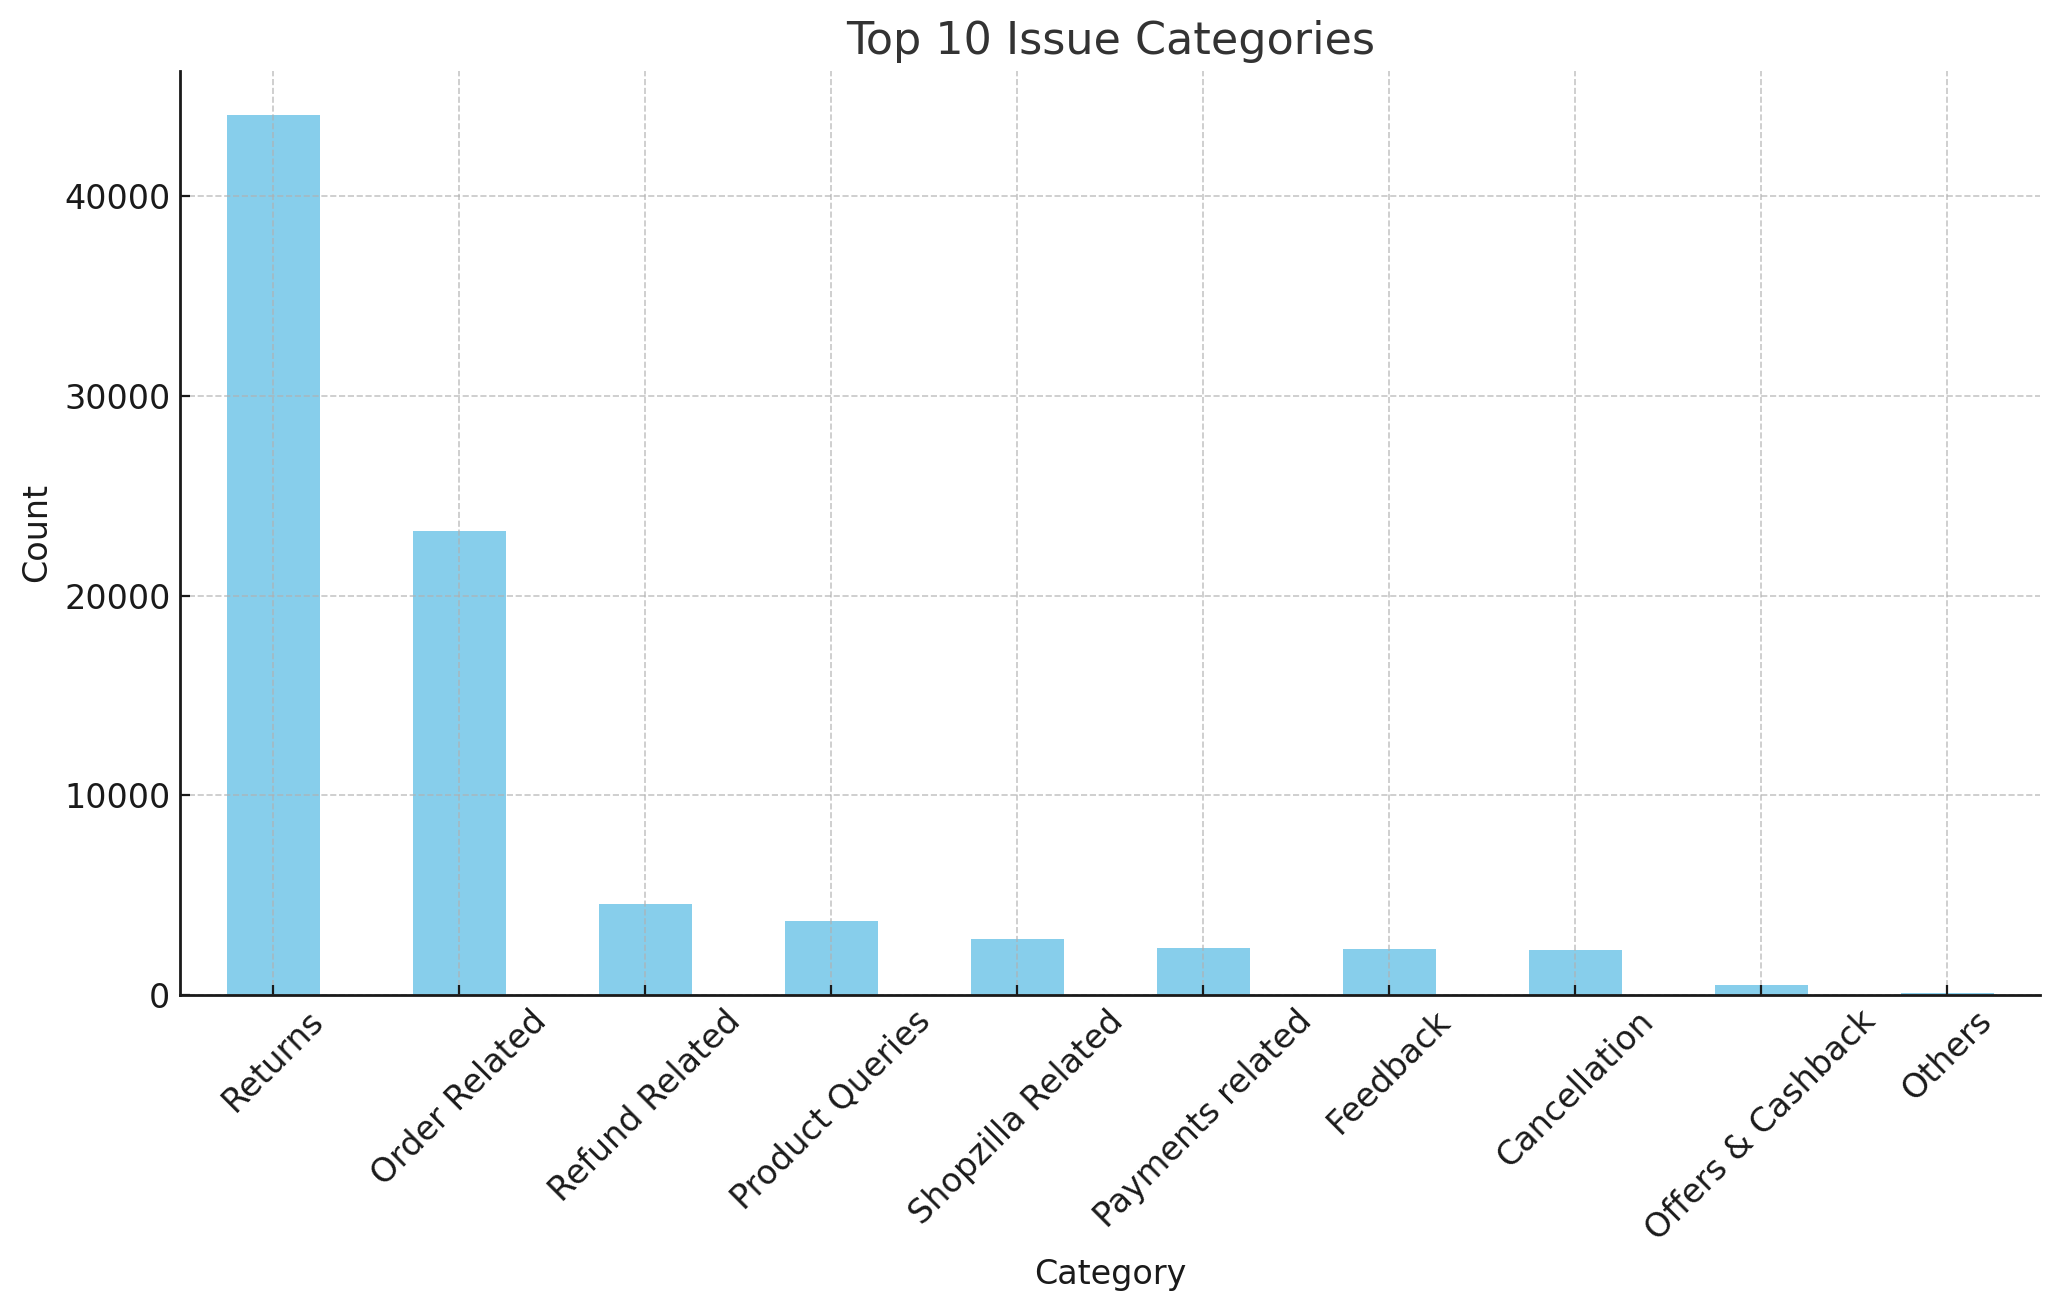

In [29]:

# Top 10 issue categories
plt.figure(figsize=(12,6))
df_cleaned['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Issue Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
    

### Handling Time Analysis

### Conclusion


- Most issues belong to a few key categories, which could help prioritize solutions.
- The CSAT Score is generally high, indicating positive customer experience.
- There are significant missing values in some columns, which were either removed or imputed.
- Handling time varies, and further analysis could be done to optimize customer service performance.
    